In [1]:
# Import our dependencies

import pandas as pd

import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)


In [3]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y


In [4]:
df.head(10)

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
5,5.281440,5.183203,1
6,-6.822188,4.297689,0
7,-9.753137,4.710871,0
8,-9.645101,3.001512,0
9,5.465926,7.140513,1


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

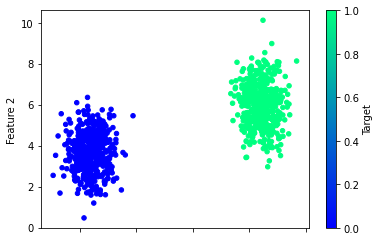

In [5]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [6]:
# Use sklearn to split dataset into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()


In [8]:
# Fit the scaler
X_scaler.fit(X_train)


StandardScaler()

In [9]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [10]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()


The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:
	• The input_dim parameter indicates how many inputs will be in the model (in this case two).
	• The units parameter indicates how many neurons we want in the hidden layer (in this case one).
	• The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.
Putting it all together, our first Dense layer should have the following Python code:

In [11]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [12]:
#Now that input and hidden layer we must add on outpul layer

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [13]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
# Fit the model to the training data

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6590 - accuracy: 0.7413
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.8613
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6444 - accuracy: 0.8880
Epoch 4/100
24/24 [==============================] - 0s 892us/step - loss: 0.6357 - accuracy: 0.9107
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.9347
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.9480
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.9600
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.9693
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.9773
Epoch 10/100
24/24 [==============================] - 0s 983us/step - loss: 0.5633 - accuracy: 0.9840
Epoch

24/24 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 934us/step - loss: 0.0936 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 869us/step - loss: 0.0921 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 939us/step - loss: 0.0906 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 974us/step - loss: 0.0891 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 930us/step - loss: 0.0862 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 948us/step - loss: 0.0835 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 921us/step - loss: 0.0821 - accuracy: 1.0000

In [16]:

# Create a DataFrame containing training history

history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

<AxesSubplot:>

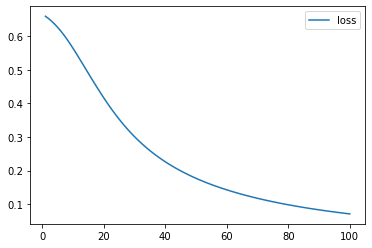

In [17]:
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

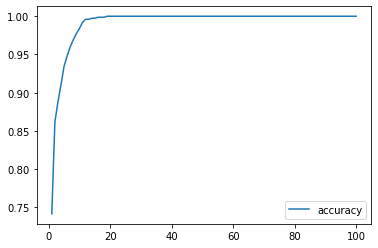

In [18]:

# Plot the accuracy

history_df.plot(y="accuracy")


In [19]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0736 - accuracy: 1.0000 - 113ms/epoch - 14ms/step
Loss: 0.07360514998435974, Accuracy: 1.0


In [20]:
# Predict the classification of a new set of blob data

new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 73ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])